In [2]:
# Import libraries
from numpy import loadtxt
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Data Loading
# Upload the csv file
from google.colab import files
data= files.upload()

Saving PM2.5_2023.csv to PM2.5_2023.csv


In [4]:
#Reading csv file
dataset_train = pd.read_csv('PM2.5_2023.csv')
dataset_train.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/03/2023,AQS,360010005,1,14.0,ug/m3 LC,60,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
1,01/06/2023,AQS,360010005,1,3.5,ug/m3 LC,19,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
2,01/09/2023,AQS,360010005,1,10.0,ug/m3 LC,53,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
3,01/12/2023,AQS,360010005,1,7.3,ug/m3 LC,41,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
4,01/15/2023,AQS,360010005,1,4.0,ug/m3 LC,22,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464


In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12424 entries, 0 to 12423
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            12424 non-null  object 
 1   Source                          12424 non-null  object 
 2   Site ID                         12424 non-null  int64  
 3   POC                             12424 non-null  int64  
 4   Daily Mean PM2.5 Concentration  12424 non-null  float64
 5   Units                           12424 non-null  object 
 6   Daily AQI Value                 12424 non-null  int64  
 7   Local Site Name                 12424 non-null  object 
 8   Daily Obs Count                 12424 non-null  int64  
 9   Percent Complete                12424 non-null  float64
 10  AQS Parameter Code              12424 non-null  int64  
 11  AQS Parameter Description       12424 non-null  object 
 12  Method Code                     

In [ ]:
#Data Cleaning


In [6]:
# Checking if any records are having null values. Checking their percentage

missing_values = dataset_train.isna().sum()
total_rows = len(dataset_train)
print((missing_values/total_rows) * 100) #"Daily Mean PM2.5 Concentration" doesn't contain any null values

Date                              0.000000
Source                            0.000000
Site ID                           0.000000
POC                               0.000000
Daily Mean PM2.5 Concentration    0.000000
Units                             0.000000
Daily AQI Value                   0.000000
Local Site Name                   0.000000
Daily Obs Count                   0.000000
Percent Complete                  0.000000
AQS Parameter Code                0.000000
AQS Parameter Description         0.000000
Method Code                       0.700258
Method Description                0.700258
CBSA Code                         3.420798
CBSA Name                         3.420798
State FIPS Code                   0.000000
State                             0.000000
County FIPS Code                  0.000000
County                            0.000000
Site Latitude                     0.000000
Site Longitude                    0.000000
dtype: float64


In [7]:
#Data Cleaning
dataset_train[110:120] #data rows are not in ascending order which violets the timeseries

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
110,12/14/2023,AQS,360010005,1,3.6,ug/m3 LC,20,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
111,12/17/2023,AQS,360010005,1,8.6,ug/m3 LC,48,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
112,12/20/2023,AQS,360010005,1,4.3,ug/m3 LC,24,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
113,12/23/2023,AQS,360010005,1,10.0,ug/m3 LC,53,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
114,12/26/2023,AQS,360010005,1,10.4,ug/m3 LC,53,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
115,12/29/2023,AQS,360010005,1,4.5,ug/m3 LC,25,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
116,01/06/2023,AQS,360010005,2,3.4,ug/m3 LC,19,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
117,01/12/2023,AQS,360010005,2,7.1,ug/m3 LC,39,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
118,01/18/2023,AQS,360010005,2,5.2,ug/m3 LC,29,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
119,01/24/2023,AQS,360010005,2,3.9,ug/m3 LC,22,ALBANY COUNTY HEALTH DEPT,1,100.0,...,145.0,R & P Model 2025 PM-2.5 Sequential Air Sampler...,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464


In [8]:
dataset_train['Date'] = pd.to_datetime(dataset_train['Date']) #Changing to date time and then sorting the rows as per "Date" column
dataset_train = dataset_train.sort_values(by='Date')

dataset_train.reset_index(drop=True, inplace=True) #sorting the index because "sort_values method doesn't sort the index of the dataframe"
dataset_train[110:120]

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
110,2023-01-04,AQS,361010003,24,3.7,ug/m3 LC,21,PINNACLE STATE PARK,1,100.0,...,736.0,Teledyne T640 at 5.0 LPM (Corrected),18500.0,"Corning, NY",36,New York,101,Steuben,42.091420,-77.209780
111,2023-01-04,AQS,360810124,24,17.3,ug/m3 LC,66,QUEENS COLLEGE 2,1,100.0,...,736.0,Teledyne T640 at 5.0 LPM (Corrected),35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,81,Queens,40.736140,-73.821530
112,2023-01-04,AQS,360010005,23,6.8,ug/m3 LC,38,ALBANY COUNTY HEALTH DEPT,1,100.0,...,736.0,Teledyne T640 at 5.0 LPM (Corrected),10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.642250,-73.754640
113,2023-01-04,AQS,360671015,24,4.3,ug/m3 LC,24,EAST SYRACUSE,1,100.0,...,736.0,Teledyne T640 at 5.0 LPM (Corrected),45060.0,"Syracuse, NY",36,New York,67,Onondaga,43.052350,-76.059210
114,2023-01-04,AQS,360810125,1,16.4,ug/m3 LC,65,Queens College Near Road,1,100.0,...,702.0,PM2.5 SCC w/Correction Factor,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,81,Queens,40.739264,-73.817694
115,2023-01-04,AQS,360850111,3,14.5,ug/m3 LC,61,FRESHKILLS WEST,1,100.0,...,702.0,PM2.5 SCC w/Correction Factor,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,85,Richmond,40.580270,-74.198320
116,2023-01-04,AQS,360870005,3,12.9,ug/m3 LC,58,Rockland County,1,100.0,...,702.0,PM2.5 SCC w/Correction Factor,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,87,Rockland,41.182080,-74.028190
117,2023-01-04,AQS,360551007,4,7.4,ug/m3 LC,41,ROCHESTER 2,1,100.0,...,236.0,Teledyne T640 at 5.0 LPM,40380.0,"Rochester, NY",36,New York,55,Monroe,43.146180,-77.548170
118,2023-01-04,AQS,360290023,1,7.3,ug/m3 LC,41,Buffalo Near-Road,1,100.0,...,702.0,PM2.5 SCC w/Correction Factor,15380.0,"Buffalo-Cheektowaga-Niagara Falls, NY",36,New York,29,Erie,42.921107,-78.765825
119,2023-01-04,AQS,360010005,3,8.3,ug/m3 LC,46,ALBANY COUNTY HEALTH DEPT,1,100.0,...,236.0,Teledyne T640 at 5.0 LPM,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.642250,-73.754640


In [9]:
#feature selection
training_set =dataset_train.iloc[:,4:5].values
training_set

array([[ 5.3],
       [10.4],
       [13.2],
       ...,
       [ 7.8],
       [ 6.7],
       [ 8.4]])

array([[<Axes: title={'center': 'Daily Mean PM2.5 Concentration'}>]],
      dtype=object)

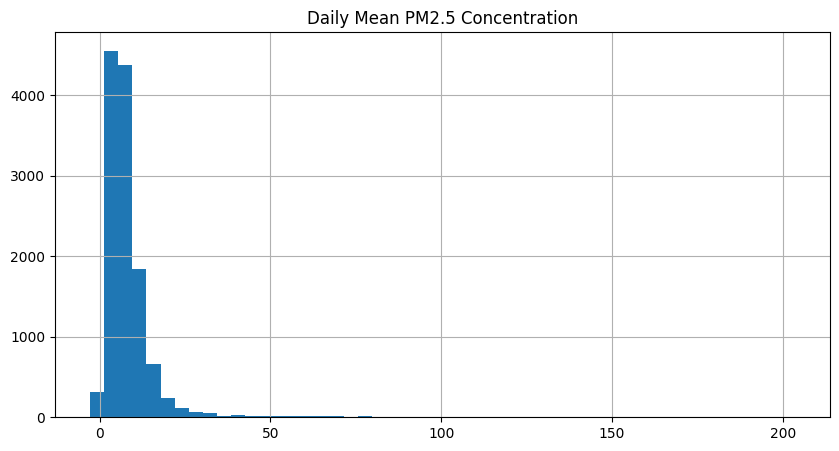

In [10]:
#Data exploration
df_trainingSet = dataset_train[['Daily Mean PM2.5 Concentration']]
df_trainingSet.hist(bins = 50, figsize=(10,5))

In [11]:
#feature scaling -> Normalization

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled= sc.fit_transform(training_set)
training_set_scaled

array([[0.03926321],
       [0.06398449],
       [0.07755696],
       ...,
       [0.05138148],
       [0.04604944],
       [0.05428987]])

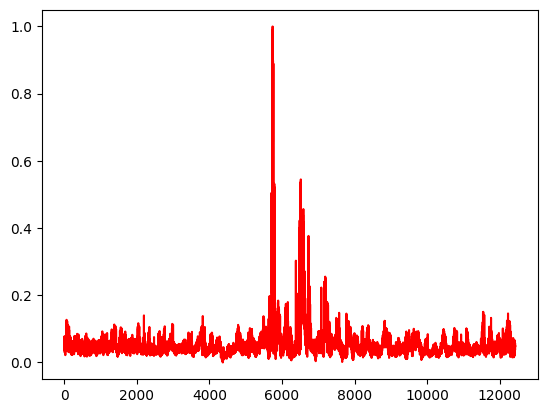

In [12]:
#visualizing training set
import matplotlib.pyplot as plt
plt.plot(training_set_scaled, color='red', label='Real pm2.5')

array([[<Axes: title={'center': 'Daily Mean PM2.5 Concentration'}>]],
      dtype=object)

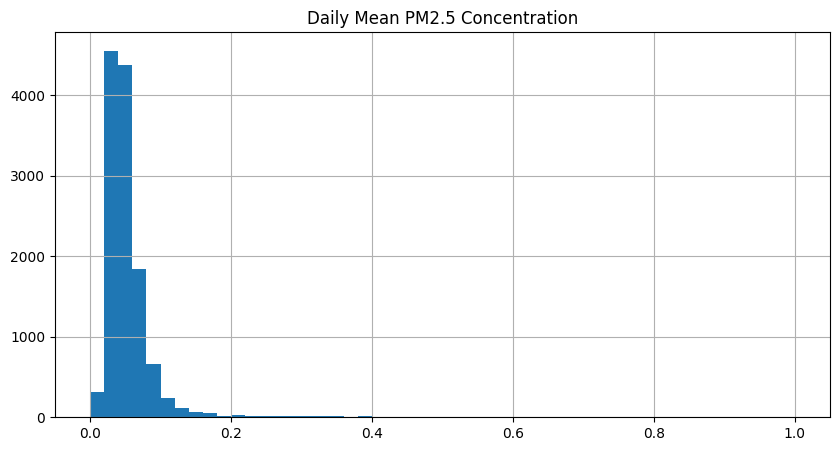

In [13]:
df_trainingSet = pd.DataFrame(training_set_scaled, columns=['Daily Mean PM2.5 Concentration']) #replacing values of array to dataframe "df_trainingSet" to visualize
df_trainingSet.hist(bins = 50, figsize=(10,5))

In [85]:
#Preparing training data
# Creating a data structure with 60 timesteps (2months) and 1 output
X_train =[]
y_train =[]
for i in range (60, 12424):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [86]:
X_train

array([[0.03926321, 0.06398449, 0.07755696, ..., 0.06931653, 0.03538536,
        0.07077072],
       [0.06398449, 0.07755696, 0.06931653, ..., 0.03538536, 0.07077072,
        0.08240427],
       [0.07755696, 0.06931653, 0.07270965, ..., 0.07077072, 0.08240427,
        0.095492  ],
       ...,
       [0.05962191, 0.03877848, 0.04265633, ..., 0.05186621, 0.03732429,
        0.03732429],
       [0.03877848, 0.04265633, 0.06301503, ..., 0.03732429, 0.03732429,
        0.05138148],
       [0.04265633, 0.06301503, 0.04459525, ..., 0.03732429, 0.05138148,
        0.04604944]])

In [87]:
X_train.shape

(12364, 60)

In [103]:
#NN Model implementation
#Building Feed Forward Neural Network/ Traditional Neural Network Model

NN_Model = Sequential()
# add the first hidden layer with 80 nodes and input is 60  (because we have timestamp of 60 i.e 2 months)
NN_Model.add(Dense(80, input_shape=(60,), activation='relu'))
# add the second hidden layer with 70 nodes
NN_Model.add(Dense(70, activation='relu'))
NN_Model.add(Dense(50, activation='relu'))
NN_Model.add(Dense(50, activation='relu'))
# define the output layer with one node that uses sigmoid activation
NN_Model.add(Dense(1, activation = 'relu'))

In [104]:
# compile the keras model
NN_Model.compile(loss='mean_squared_error', optimizer='adam')

In [105]:
# fit the keras model on the dataset
NN_Model.fit(X_train, y_train, epochs=10, batch_size=40)

Epoch 1/10
310/310 [==============================] - 3s 2ms/step - loss: 9.8169e-04
Epoch 2/10
310/310 [==============================] - 1s 2ms/step - loss: 8.1461e-04
Epoch 3/10
310/310 [==============================] - 1s 2ms/step - loss: 7.5447e-04
Epoch 4/10
310/310 [==============================] - 1s 2ms/step - loss: 7.3367e-04
Epoch 5/10
310/310 [==============================] - 1s 2ms/step - loss: 7.5356e-04
Epoch 6/10
310/310 [==============================] - 1s 2ms/step - loss: 6.9065e-04
Epoch 7/10
310/310 [==============================] - 1s 2ms/step - loss: 6.7477e-04
Epoch 8/10
310/310 [==============================] - 1s 2ms/step - loss: 6.4788e-04
Epoch 9/10
310/310 [==============================] - 1s 2ms/step - loss: 6.4689e-04
Epoch 10/10
310/310 [==============================] - 1s 2ms/step - loss: 6.8313e-04


In [20]:
#load the the testing data
data= files.upload()
dataset_test= pd.read_csv('PM2.5_2024.csv')


Saving PM2.5_2024.csv to PM2.5_2024.csv


In [21]:
#Sorting testing records as well
dataset_test['Date'] = pd.to_datetime(dataset_test['Date'])
dataset_test = dataset_test.sort_values(by='Date')

dataset_test.reset_index(drop=True, inplace=True) #sorting the index because "sort_values method doesn't sort the index of the dataframe"
dataset_test[290:300]

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
290,2024-01-12,AirNow,360550015,4,7.0,ug/m3 LC,39,Rochester Near-Road,1,100.0,...,NaN,NaN,40380.0,"Rochester, NY",36,New York,55,Monroe,43.145013,-77.557280
291,2024-01-12,AirNow,360610135,3,8.7,ug/m3 LC,48,CCNY,1,100.0,...,NaN,NaN,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,61,New York,40.819760,-73.948250
292,2024-01-12,AirNow,360850111,3,9.1,ug/m3 LC,51,FRESHKILLS WEST,1,100.0,...,NaN,NaN,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,85,Richmond,40.580270,-74.198320
293,2024-01-12,AirNow,360710002,3,8.6,ug/m3 LC,48,NEWBURGH,1,100.0,...,NaN,NaN,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,71,Orange,41.499160,-74.008850
294,2024-01-12,AirNow,360810120,3,9.1,ug/m3 LC,51,MASPETH LIBRARY,1,100.0,...,NaN,NaN,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,81,Queens,40.726980,-73.893130
295,2024-01-12,AirNow,360590005,3,9.0,ug/m3 LC,50,EISENHOWER PARK,1,100.0,...,NaN,NaN,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,59,Nassau,40.743160,-73.585490
296,2024-01-12,AirNow,360470118,4,8.4,ug/m3 LC,47,PS 274,1,100.0,...,NaN,NaN,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,47,Kings,40.694540,-73.927690
297,2024-01-12,AirNow,360010005,3,5.3,ug/m3 LC,29,ALBANY COUNTY HEALTH DEPT,1,100.0,...,NaN,NaN,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.642250,-73.754640
298,2024-01-12,AirNow,360610115,3,9.5,ug/m3 LC,52,Intermediate School 143,1,100.0,...,NaN,NaN,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,61,New York,40.849550,-73.935649
299,2024-01-12,AirNow,360050080,3,9.3,ug/m3 LC,51,MORRISANIA,1,100.0,...,NaN,NaN,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,5,Bronx,40.836060,-73.920090


In [106]:
real_PMEmmision = dataset_test.iloc[:,4:5].values
real_PMEmmision.shape

(3415, 1)

In [107]:

dataset_total=pd.concat((dataset_train['Daily Mean PM2.5 Concentration'],dataset_test['Daily Mean PM2.5 Concentration']),axis=0)  #The reason we are concatanating is beacause we want to get the last 60 records of training set. So, that we can start predicting the 0th index record of testing set
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values #starting from last 60 records to total testing records

In [108]:
inputs

array([10.2,  6.4,  5.3, ...,  8.7,  7.3,  7.9])

In [109]:
inputs=inputs.reshape(-1,1)  #reshaping to 2D array
inputs.shape

(3475, 1)

In [110]:
inputs=sc.transform(inputs)  #Again scaling in a range from 0 to 1
inputs

array([[0.06301503],
       [0.04459525],
       [0.03926321],
       ...,
       [0.05574406],
       [0.04895783],
       [0.05186621]])

In [111]:
#Spliting features and lables data
X_test = []
y_test = []

for i in range (60, 3475):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [112]:
#Predicting from model
predicted_PMEmmision =NN_Model.predict(X_test)
predicted_PMEmmision

107/107 [==============================] - 0s 2ms/step


array([[0.05055572],
       [0.04588457],
       [0.04825484],
       ...,
       [0.04374377],
       [0.04969093],
       [0.05121521]], dtype=float32)

In [113]:
predicted_PMEmmision=sc.inverse_transform(predicted_PMEmmision)
predicted_PMEmmision

array([[7.629645 ],
       [6.6659865],
       [7.154974 ],
       ...,
       [6.224339 ],
       [7.4512386],
       [7.765699 ]], dtype=float32)

In [114]:
loss = NN_Model.evaluate(X_test, y_test)
loss

107/107 [==============================] - 0s 2ms/step - loss: 1.8589e-04


0.00018588639795780182

In [115]:
predicted_PMEmmision = predicted_PMEmmision.ravel()
predicted_PMEmmision

array([7.629645 , 6.6659865, 7.154974 , ..., 6.224339 , 7.4512386,
       7.765699 ], dtype=float32)

In [116]:
real_PMEmmision = real_PMEmmision.ravel()
real_PMEmmision

array([ 4.8, 12.8, 10.9, ...,  8.7,  7.3,  7.9])

In [117]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_PMEmmision, predicted_PMEmmision)
mse

7.911267812138349

In [43]:
min_value = np.min(real_PMEmmision)
max_value = np.max(real_PMEmmision)

min_value, max_value

(-0.5, 34.3)

In [44]:
range_value = max_value - min_value
range_value

34.8

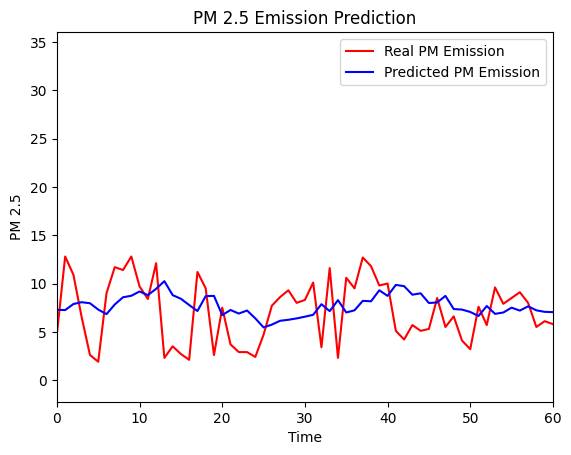

In [47]:
#visualizing the results
plt.plot(real_PMEmmision, color='red', label='Real PM Emission')
plt.plot(predicted_PMEmmision, color='blue', label='Predicted PM Emission')
plt.title('PM 2.5 Emission Prediction')
plt.xlabel('Time')
plt.ylabel('PM 2.5')
plt.legend()

plt.xlim([0, 60])
#plt.ylim([0, 10])

plt.show()

In [118]:
X_train.shape

(12364, 60)

In [119]:
#RNN Model
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))  #Requires only by RNN because X_train must be in 3 dimension. Here we are passing 1 because we have only one feature
X_train.shape

(12364, 60, 1)

In [120]:
from keras.layers import LSTM
from keras.layers import Dropout

In [121]:
#Initializing the RNN
RNN_Model =Sequential()

In [122]:
#Adding the first LSTM layer and some Dropout regularization
RNN_Model.add(LSTM(units=90, return_sequences=True, input_shape=(X_train.shape[1],1)))
RNN_Model.add(Dropout(0.2))

In [123]:
#Adding a second LSTM layer and some Dropout regularization
RNN_Model.add(LSTM(units=90, return_sequences=True))
RNN_Model.add(Dropout(0.2))

In [124]:
#Adding a third LSTM layer and some Dropout regularization
RNN_Model.add(LSTM(units=80, return_sequences=True))
RNN_Model.add(Dropout(0.2))

In [125]:
#Adding a fourth LSTM layer and some Dropout regularization
RNN_Model.add(LSTM(units=70))
RNN_Model.add(Dropout(0.2))

In [126]:
#Adding output layer
RNN_Model.add(Dense(units=1))

In [127]:
#Compiling the RNN
RNN_Model.compile(optimizer='adam', loss='mean_squared_error')

In [140]:
#Fitting the RNN to the training set
RNN_Model.fit(X_train, y_train, epochs=1, batch_size=40)

310/310 [==============================] - 63s 203ms/step - loss: 8.7608e-04


In [129]:
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [130]:
y_test = np.reshape(y_test, (y_test.shape[0],1))

In [141]:
predicted_RNN_PMEmmision_Scaled =RNN_Model.predict(X_test)
predicted_RNN_PMEmmision=sc.inverse_transform(predicted_RNN_PMEmmision_Scaled)

107/107 [==============================] - 6s 55ms/step


In [142]:
predicted_RNN_PMEmmision

array([[6.4766893],
       [6.363447 ],
       [6.9834886],
       ...,
       [6.474707 ],
       [6.489944 ],
       [6.613753 ]], dtype=float32)

In [133]:
real_PMEmmision

array([ 4.8, 12.8, 10.9, ...,  8.7,  7.3,  7.9])

In [143]:
loss = RNN_Model.evaluate(X_test, y_test)
loss

107/107 [==============================] - 6s 57ms/step - loss: 1.7382e-04


0.0001738188584567979

In [144]:
predicted_RNN_PMEmmision = predicted_RNN_PMEmmision.ravel()
predicted_RNN_PMEmmision

array([6.4766893, 6.363447 , 6.9834886, ..., 6.474707 , 6.489944 ,
       6.613753 ], dtype=float32)

In [145]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_PMEmmision, predicted_RNN_PMEmmision)
mse

7.397676016067695

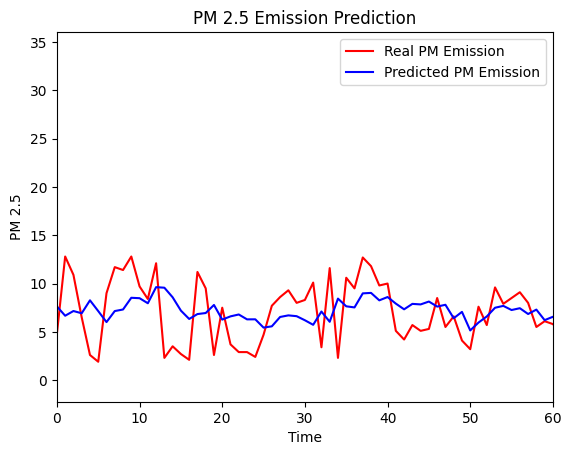

In [146]:
#visualizing the results
plt.plot(real_PMEmmision, color='red', label='Real PM Emission')
plt.plot(predicted_PMEmmision, color='blue', label='Predicted PM Emission')
plt.title('PM 2.5 Emission Prediction')
plt.xlabel('Time')
plt.ylabel('PM 2.5')
plt.legend()

plt.xlim([0, 60])

plt.show()